# Project 1, Part 6, Best Recommendation

University of California, Berkeley
Master of Information and Data Science (MIDS) program
w205 - Fundamentals of Data Engineering

Student: John (Jack) Galvin

Year: 2022

Semester: Spring

Section: 9


# Included Modules and Packages

Code cell containing your includes for modules and packages

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import psycopg2

# Supporting code

Code cells containing any supporting code, such as connecting to the database, any functions, etc.  Remember you can use any code from the labs.

In [2]:
# Function to run a select query and return rows in a pandas dataframe
# Pandas puts all numeric values from postgres to float
# If it will fit in an integer, change it to integer


def my_select_query_pandas(query, rollback_before_flag, rollback_after_flag):
    "function to run a select query and return rows in a pandas dataframe"
    
    if rollback_before_flag:
        connection.rollback()
    
    df = pd.read_sql_query(query, connection)
    
    if rollback_after_flag:
        connection.rollback()
    
    # fix the float columns that really should be integers
    
    for column in df:
    
        if df[column].dtype == "float64":

            fraction_flag = False

            for value in df[column].values:
                
                if not np.isnan(value):
                    if value - math.floor(value) != 0:
                        fraction_flag = True

            if not fraction_flag:
                df[column] = df[column].astype('Int64')
    
    return(df)

In [3]:
# Connect to Postgres

connection = psycopg2.connect(
    user = "postgres",
    password = "ucb",
    host = "postgres",
    port = "5432",
    database = "postgres"
)

In [4]:
# Create a cursor for the connection

cursor = connection.cursor()

## The executives would like your best recommendation for the business. 

## Create an executive summary giving and explaining your best recommendation for the business. 

## You must support your summary with data, in the form of output of queries, data visualization, etc. There is a 1 query minimum.

# Query 1 - Customers with 0 Purchases

In [6]:
rollback_before_flag = True
rollback_after_flag = True

query = """

select cu.first_name,
        cu.last_name
from customers as cu
    left join sales as sa
        on cu.customer_id = sa.customer_id
where sa.customer_id is null
order by cu.last_name, cu.first_name   
        
"""

df = my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)
df

,first_name,last_name
0,Tracy,Agott
1,Daniella,Arnke
2,Hyacintha,Assandri
3,Felice,Borman
4,Domini,Breit
5,Jacenta,Butterick
6,Marysa,Camillo
7,Lilas,Dukelow
8,Corinna,Dukesbury
9,Lorianna,Ellaway


# Recommendations

Based on the analysis I have done, I have formed a series of recommendations aimed at increasing our revenue. They are listed below in order of increasing complexity:

1. The customers in the table above have signed up for our service, yet have not made a single purchase. Incentivize these customers to make their first purchase (either with a coupon or targeted outreach).


2. Sharp dips in the quantity of meals sold and revenue from sales coincide with several holidays. Implement targeted promotions for these holidays with volume-based discounts and special seasonal meal offerings.

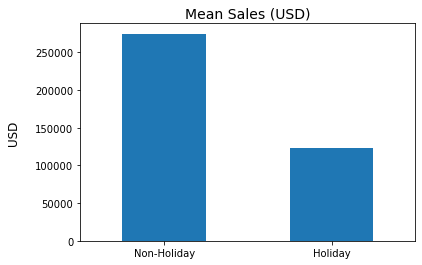

3. Most of our customers live within 15 miles of a store, with a sharp dropoff at 16 miles. Use delivery specials to entice those beyond 15 miles to buy our products. This can be seen visually below.

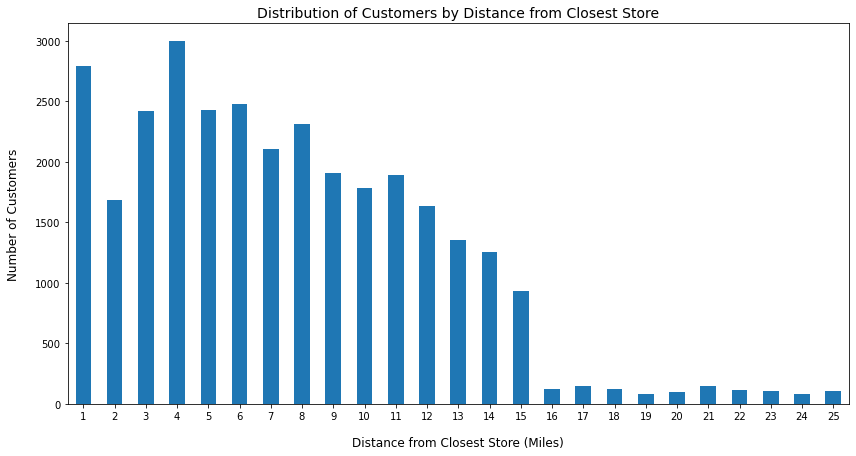

4. We have a plethora of data about our customers' behavior - namely, how recently they have purchased, how frequently they purchase, and how much they have spent. Deploy a RFM customer model to (a) nurture already-strong customer relationships, (b) grow existing customers, and (c) proactively identify those at risk of churning.